In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


from sklearn.impute import SimpleImputer ## HAndling Missing Values
from sklearn.preprocessing import StandardScaler # HAndling Feature Scaling
from sklearn.preprocessing import OneHotEncoder
## pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import pickle

In [11]:
data = pd.read_excel('data/Nifty_Spread_Data.xlsx')

In [12]:
data

,Date,Day,Remaining_day,Vix,Moment_in_vix,Closing_price,Moment_in_price,Strike_price,Option_type,Spread
0,2021-01-05,Tuesday,9,20.46,0.43,14217.95,108.00,14200,CE,63.05
1,2021-01-05,Tuesday,9,20.46,0.43,14217.95,108.00,14200,PE,58.00
2,2021-01-06,Wednesday,8,20.99,0.53,14190.00,-60.50,14200,CE,70.70
3,2021-01-06,Wednesday,8,20.99,0.53,14190.00,-60.50,14200,PE,63.00
4,2021-01-07,Thursday,7,20.61,-0.38,14191.10,-9.00,14200,CE,71.80
...,...,...,...,...,...,...,...,...,...,...
501,2023-03-28,Tuesday,9,15.10,-0.34,16970.60,-66.80,17000,PE,36.85
502,2023-03-29,Wednesday,8,13.62,-1.48,17064.10,93.50,17100,CE,65.25
503,2023-03-29,Wednesday,8,13.62,-1.48,17064.10,93.50,17100,PE,39.70
504,2023-03-31,Friday,6,12.93,-0.69,17442.65,378.55,17400,CE,59.00


In [13]:
data.drop(['Date'] ,axis = 1, inplace = True)

In [15]:
data['Remaining_day']=data['Remaining_day'].replace(3 , 4)

In [16]:
data_ce = data[data['Option_type'] == 'CE']

In [17]:
data_pe = data[data['Option_type'] == 'PE']

In [18]:
data_pe.head()

,Day,Remaining_day,Vix,Moment_in_vix,Closing_price,Moment_in_price,Strike_price,Option_type,Spread
1,Tuesday,9,20.46,0.43,14217.95,108.0,14200,PE,58.00
3,Wednesday,8,20.99,0.53,14190.00,-60.5,14200,PE,63.00
5,Thursday,7,20.61,-0.38,14191.10,-9.0,14200,PE,61.40
7,Friday,6,20.64,0.03,14370.90,90.0,14400,PE,65.00
9,Monday,4,22.38,1.74,14489.25,36.0,14500,PE,76.45


In [19]:
data_ce.head()

,Day,Remaining_day,Vix,Moment_in_vix,Closing_price,Moment_in_price,Strike_price,Option_type,Spread
0,Tuesday,9,20.46,0.43,14217.95,108.0,14200,CE,63.05
2,Wednesday,8,20.99,0.53,14190.00,-60.5,14200,CE,70.70
4,Thursday,7,20.61,-0.38,14191.10,-9.0,14200,CE,71.80
6,Friday,6,20.64,0.03,14370.90,90.0,14400,CE,75.00
8,Monday,4,22.38,1.74,14489.25,36.0,14500,CE,88.35


In [21]:
data_ce.shape

(253, 9)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Day              506 non-null    object 
 1   Remaining_day    506 non-null    int64  
 2   Vix              506 non-null    float64
 3   Moment_in_vix    506 non-null    float64
 4   Closing_price    506 non-null    float64
 5   Moment_in_price  506 non-null    float64
 6   Strike_price     506 non-null    int64  
 7   Option_type      506 non-null    object 
 8   Spread           506 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.7+ KB


In [24]:
# Divide data in numerical and categorical 

numerical_columns = []
categorical_columns = []
for col in data.columns:
    if data[col].dtype == 'object': 
        categorical_columns.append(col)
    else:
        numerical_columns.append(col)
        
        
print(numerical_columns)
print(categorical_columns)

['Remaining_day', 'Vix', 'Moment_in_vix', 'Closing_price', 'Moment_in_price', 'Strike_price', 'Spread']
['Day', 'Option_type']


--------------------------------------------------------------------------------------


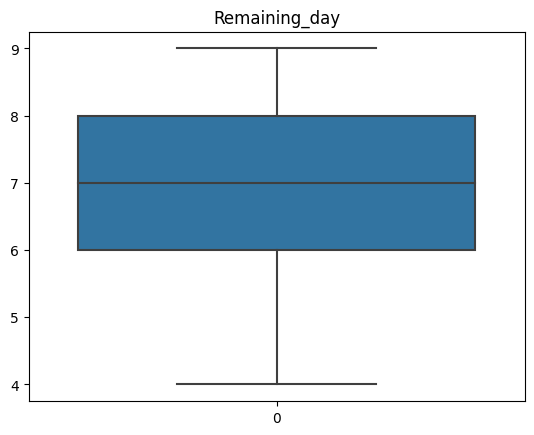

--------------------------------------------------------------------------------------


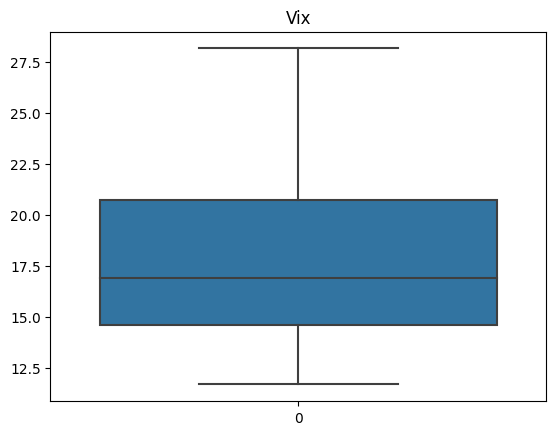

--------------------------------------------------------------------------------------


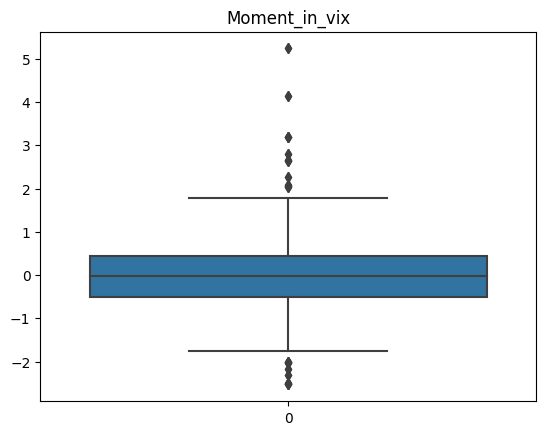

--------------------------------------------------------------------------------------


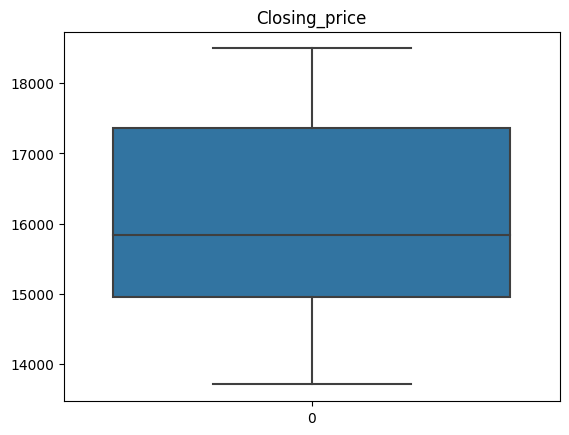

--------------------------------------------------------------------------------------


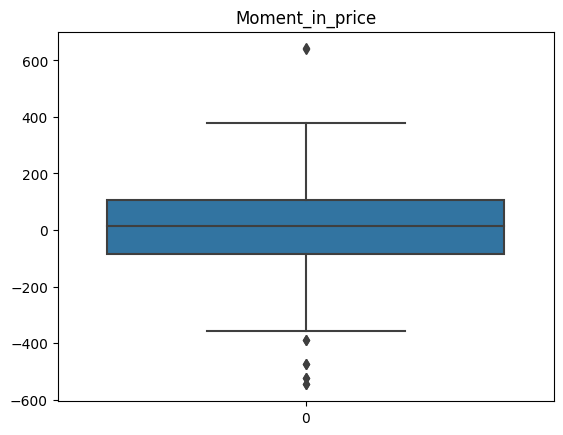

--------------------------------------------------------------------------------------


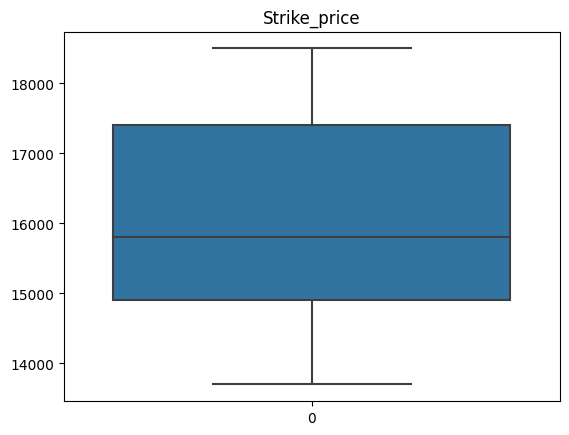

--------------------------------------------------------------------------------------


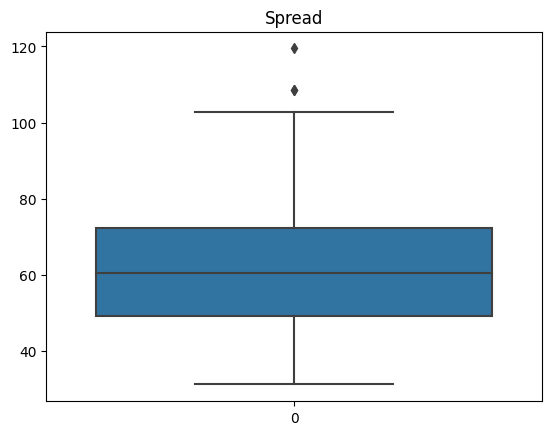

In [25]:
# find the outlier

for col in numerical_columns:
    plt.title(col)
    sns.boxplot(data[col])
    print("--------------------------------------------------------------------------------------")
    plt.show()

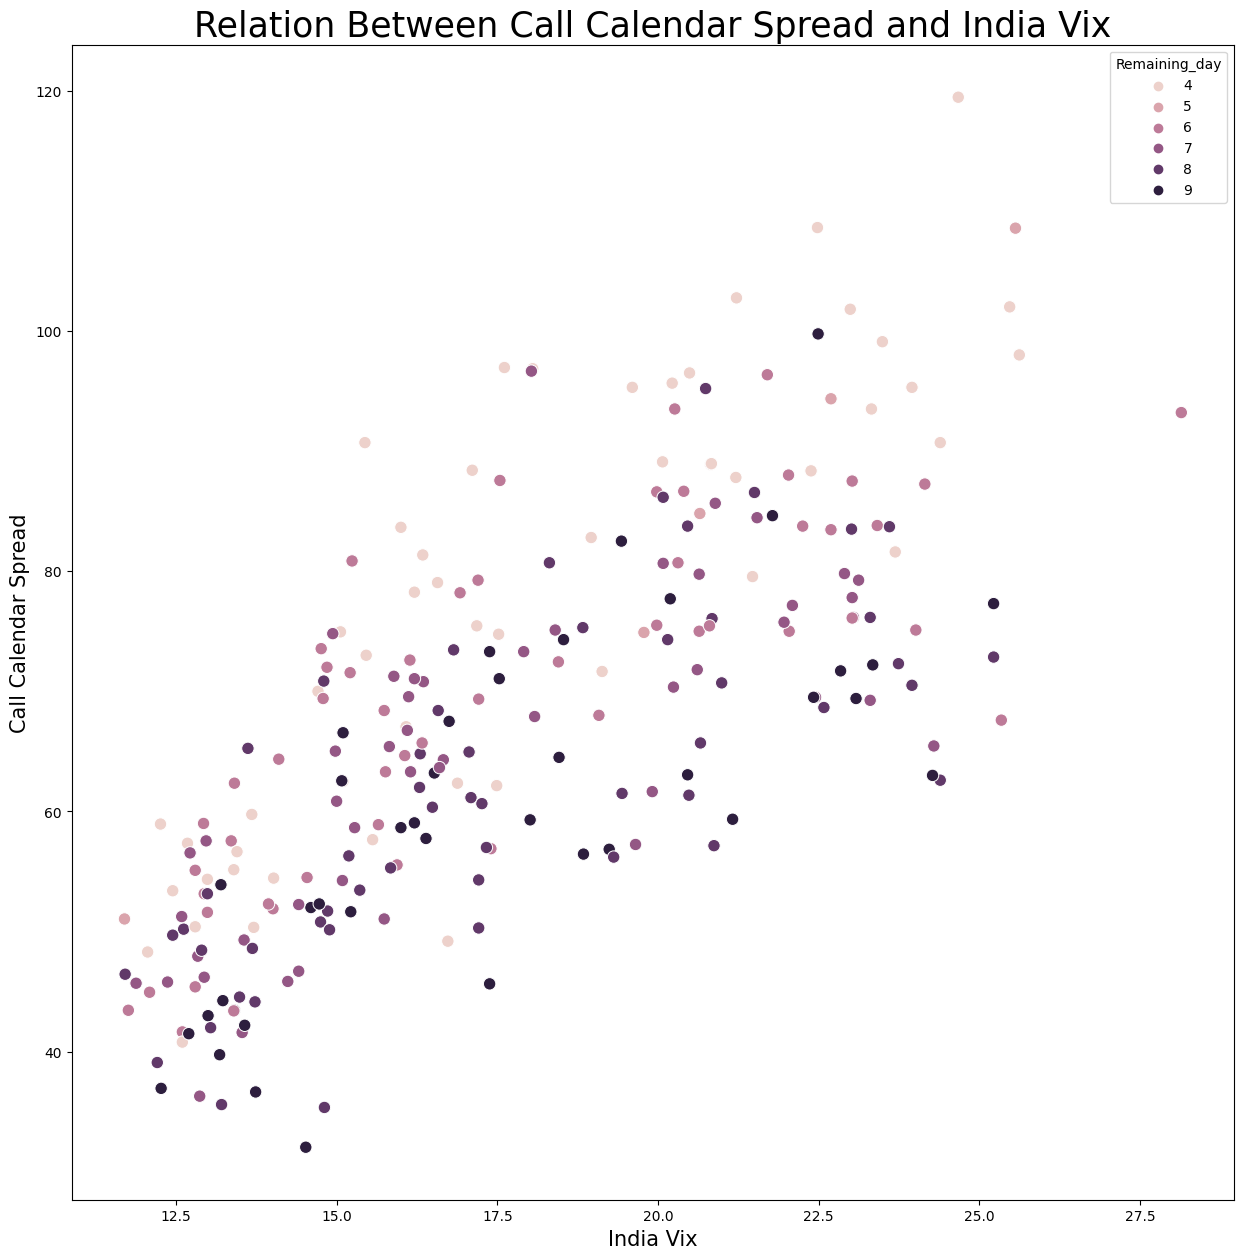

In [26]:
plt.figure(figsize = (15,15))
plt.title('Relation Between Call Calendar Spread and India Vix' , fontsize = 25)
plt.xlabel('India Vix' , fontsize= 15)
plt.ylabel('Call Calendar Spread' , fontsize= 15)
sns.scatterplot(y = data_ce['Spread'] , x = data_ce['Vix'] , hue = data_ce['Remaining_day'],s = 80)
plt.show()

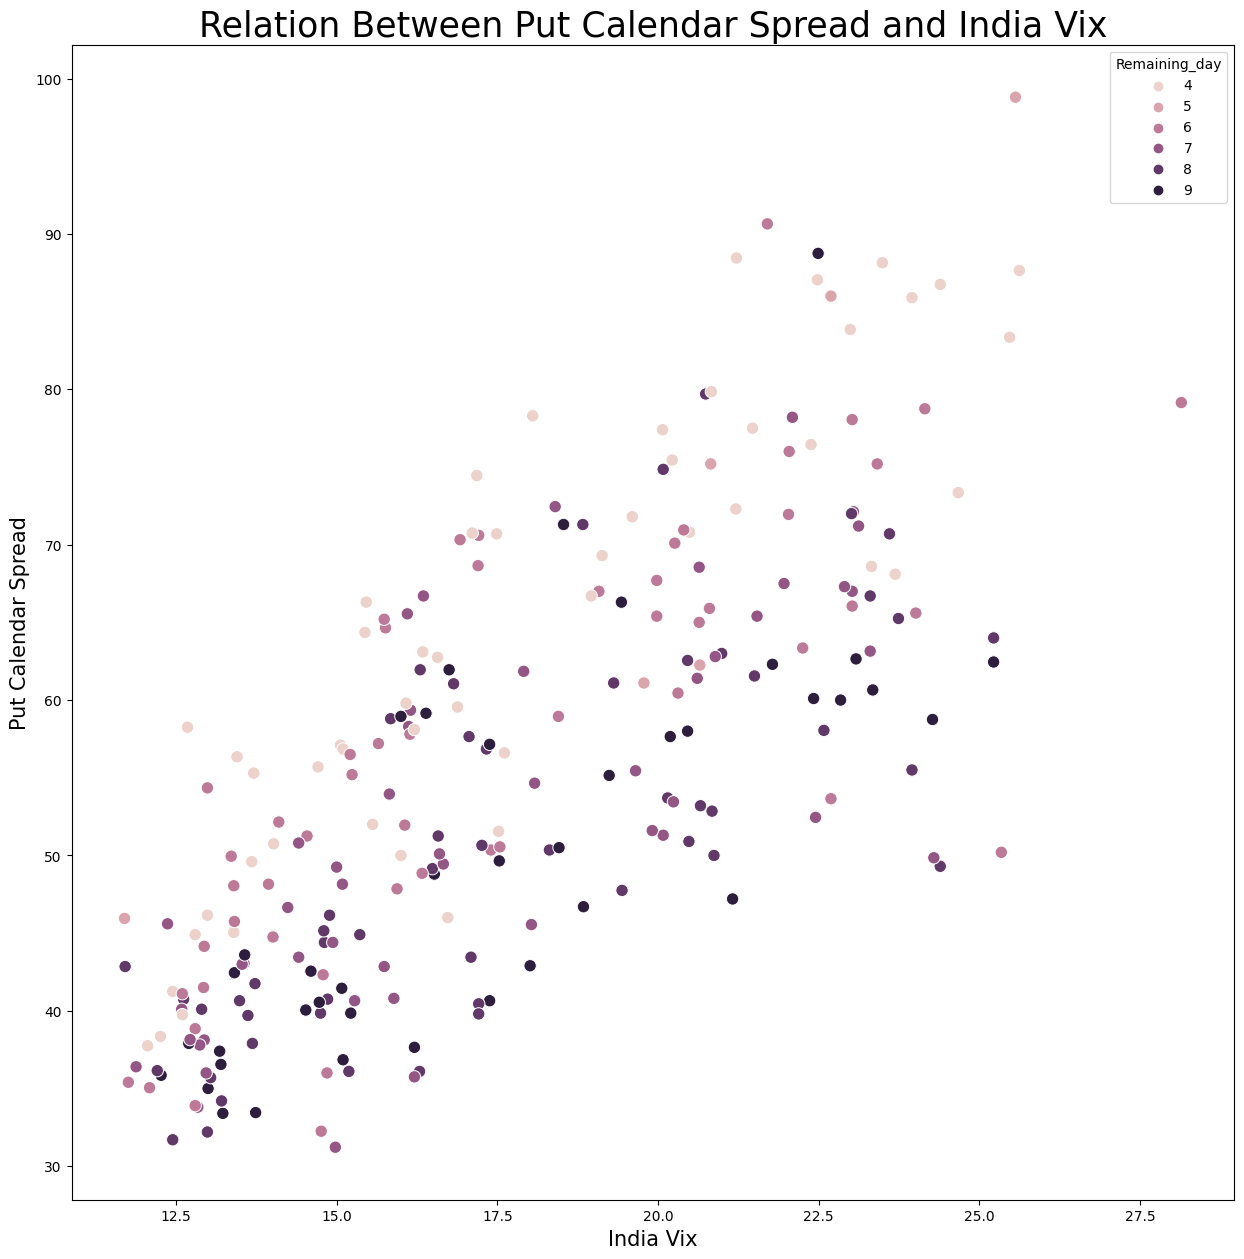

In [27]:
plt.figure(figsize = (15,15))
plt.title('Relation Between Put Calendar Spread and India Vix' , fontsize = 25)
plt.xlabel('India Vix' , fontsize= 15)
plt.ylabel('Put Calendar Spread' , fontsize= 15)
sns.scatterplot(y = data_pe['Spread'] , x = data_pe['Vix'] , hue = data_pe['Remaining_day'] , s = 80)
plt.show()

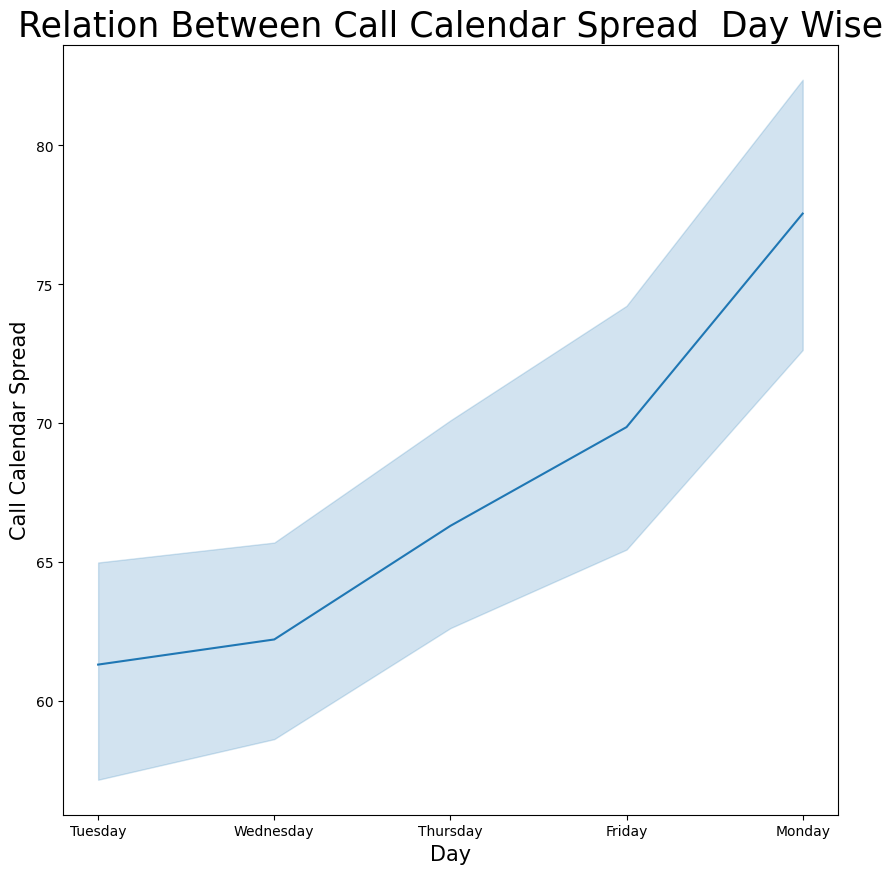

In [28]:
plt.figure(figsize = (10,10))
plt.title('Relation Between Call Calendar Spread  Day Wise' , fontsize = 25)
plt.xlabel('Day' , fontsize= 15)
plt.ylabel('Call Calendar Spread' , fontsize = 15)
sns.lineplot(x= data_ce["Day"] , y = data_ce["Spread"])
plt.show()

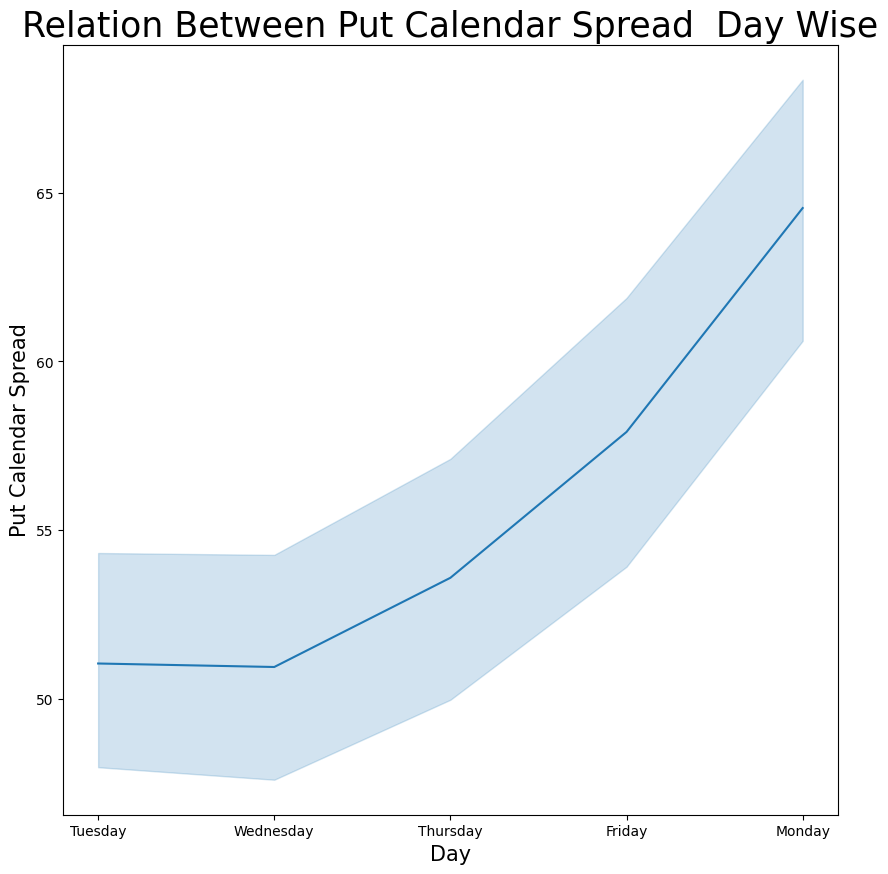

In [29]:
plt.figure(figsize = (10,10))
plt.title('Relation Between Put Calendar Spread  Day Wise' , fontsize = 25)
plt.xlabel('Day' , fontsize= 15)
plt.ylabel('Put Calendar Spread' , fontsize = 15)
sns.lineplot(x= data_pe["Day"] , y = data_pe["Spread"])
plt.show()

In [30]:
data.head()

,Day,Remaining_day,Vix,Moment_in_vix,Closing_price,Moment_in_price,Strike_price,Option_type,Spread
0,Tuesday,9,20.46,0.43,14217.95,108.0,14200,CE,63.05
1,Tuesday,9,20.46,0.43,14217.95,108.0,14200,PE,58.00
2,Wednesday,8,20.99,0.53,14190.00,-60.5,14200,CE,70.70
3,Wednesday,8,20.99,0.53,14190.00,-60.5,14200,PE,63.00
4,Thursday,7,20.61,-0.38,14191.10,-9.0,14200,CE,71.80


<Axes: >

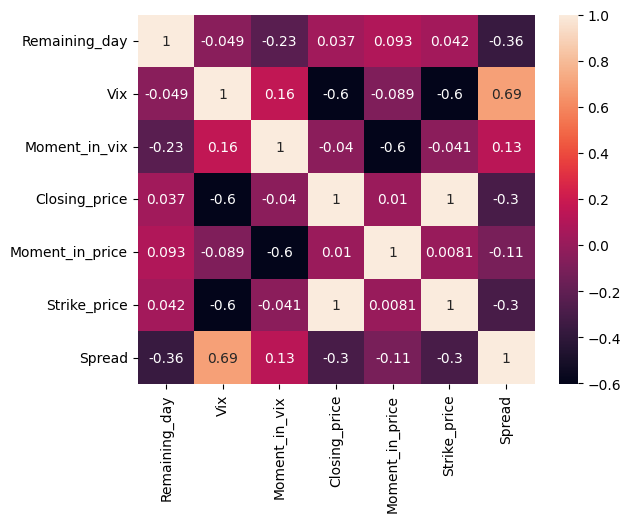

In [32]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [33]:
data.drop(['Closing_price' , 'Strike_price'] , axis=1 , inplace = True)

In [35]:
# Divide data in independent and dependent feature

X = data.drop(['Spread'] , axis = 1)
y = data['Spread']

In [36]:
X

,Day,Remaining_day,Vix,Moment_in_vix,Moment_in_price,Option_type
0,Tuesday,9,20.46,0.43,108.00,CE
1,Tuesday,9,20.46,0.43,108.00,PE
2,Wednesday,8,20.99,0.53,-60.50,CE
3,Wednesday,8,20.99,0.53,-60.50,PE
4,Thursday,7,20.61,-0.38,-9.00,CE
...,...,...,...,...,...,...
501,Tuesday,9,15.10,-0.34,-66.80,PE
502,Wednesday,8,13.62,-1.48,93.50,CE
503,Wednesday,8,13.62,-1.48,93.50,PE
504,Friday,6,12.93,-0.69,378.55,CE


In [37]:
y

0      63.05
1      58.00
2      70.70
3      63.00
4      71.80
       ...  
501    36.85
502    65.25
503    39.70
504    59.00
505    41.50
Name: Spread, Length: 506, dtype: float64

In [39]:
# Difine a data in numerical and categorical

num_col = X.select_dtypes(exclude='object').columns
cat_col = X.select_dtypes(include='object').columns

In [40]:
num_col

Index(['Remaining_day', 'Vix', 'Moment_in_vix', 'Moment_in_price'], dtype='object')

In [41]:
cat_col

Index(['Day', 'Option_type'], dtype='object')

In [42]:

num_pipeline = Pipeline(
            steps = [
                ("imputer" , SimpleImputer(strategy = 'median')),
                ('scaler' , StandardScaler())
            ])

cat_pipeline = Pipeline(
                steps = [
                    ("imputer" , SimpleImputer(strategy = "most_frequent")),
                    ('encoder' , OneHotEncoder(sparse=False)),
                    ('scaler' , StandardScaler())
                ])
preprocessor=ColumnTransformer(
    [
('num_pipeline',num_pipeline,num_col),
('cat_pipeline' , cat_pipeline , cat_col)

]
)

In [43]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state = 40)

In [44]:
X_train

,Day,Remaining_day,Vix,Moment_in_vix,Moment_in_price,Option_type
213,Friday,6,14.79,-0.79,4.55,PE
388,Friday,6,17.20,-0.71,-167.45,CE
284,Wednesday,8,11.71,-0.99,6.40,CE
334,Monday,4,17.49,2.26,-224.60,CE
175,Monday,4,19.13,-0.05,-3.55,PE
...,...,...,...,...,...,...
440,Thursday,7,16.60,-0.66,47.75,CE
165,Monday,4,19.60,-0.66,237.15,PE
7,Friday,6,20.64,0.03,90.00,PE
219,Wednesday,8,15.36,0.62,-77.35,PE


In [45]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [49]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train , y_train)

RandomForestRegressor()

In [50]:
y_pred = rf_model.predict(X_test)

In [51]:
r2_score(y_pred , y_test)

0.7184651530330095